# Importing the libraries

In [30]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

# Loading and analysing the dataset

In [31]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [32]:
print(data.head())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.describe())
print(data.columns.tolist())
print(data.isnull().sum())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(25, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
Hours     float64
Scores      int64
dtype: object
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
['Hours', 'Scores']
Hours     0
Scores    0
dtype: int64


# Visualising the data given

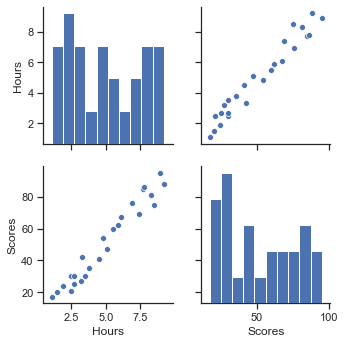

In [33]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, palette="husl")

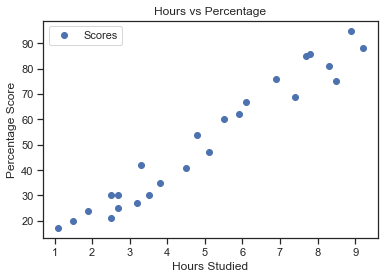

In [34]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing the data

In [35]:
X=data.drop("Scores",1)
y=data[["Scores"]]

# Splitting and Scaling the dataset

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Algorithm

In [37]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# Comparing Actual vs Predicted

In [38]:
df2 = pd.DataFrame(y_pred)
df2.columns = ["Predicted"]

df1 = pd.DataFrame(y_test, index = None)
df1.reset_index(drop=True, inplace=True)
df1.columns = ["Actual"]

In [39]:
df = pd.concat([df1, df2], axis=1)
display(df)

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Checking the accuracy via metrics and cross validation

In [40]:
r = r2_score(y_test, y_pred)
print("R^2: %f" % (r*100))

m = mean_squared_error(y_test, y_pred)
mm = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(m)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mm))

R^2: 93.676610
RMSE: 4.509204
MAE: 4.130880


In [41]:
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 3)
print("K Fold Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

K Fold Accuracy: 93.22 %
Standard Deviation: 1.62 %


# Plotting the regression line

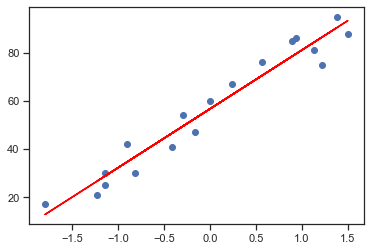

In [42]:
a = regressor.coef_
b = regressor.intercept_
line = a*X_train + b

plt.scatter(X_train, y_train)
plt.plot(X_train, line, color='red');
plt.show()

# Evaluating the model

In [43]:
# You can also test with your own data
hours1 = [[9.25]]
hours = sc.transform(hours1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours1))
print("Predicted Score = {}".format(own_pred))

No of Hours = [[9.25]]
Predicted Score = [[93.89272889]]


In [44]:
# If a student studies for 9.25 hours, He or She will score 93.89272889%